# Applying EDA to Your Data
Exploratory Data Analysis is the most exciting phase in data analysis. It help us understand the data better and figure out how to successfully solve the business problem - report our findings, do machine learning, etc.

Download the Superstore dataset from:https://community.tableau.com/docs/DOC-1236 and do the following:

Step 1: Import your data

Step 2: Examine your data using pandas to:

- show information about the number of rows and columns (shape of the data)

- find the mean and median values, the unique values and plot your data to understand how distributed it is; do this for all columns. 

- create and display the correlation matrix; interpret it and tell what are the correlated features (if any)

Don't limit yourself to the suggested steps and do anything else you find to be potentially useful to understand Superstore data better.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#! dir 
# list items in current directory and identify the downloaded xls file

### Load the Superstore dataset

In [5]:
#df = pd.read_excel('m3w4_Superstore.xls', None )

In [9]:
xl = pd.ExcelFile('m3w4_Superstore.xls')

xl.sheet_names  # see all sheet names

['Orders', 'Returns', 'People']

#### The above implies there are three sheets in the dataset that can be explored

## Examining the Orders sheet

In [26]:
df = xl.parse('Orders', index_col=0)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [16]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [17]:
df.shape

(9994, 21)

In [22]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

As displayed above, the dataset doesnt have any null values!

#### Viewing important stats from the numeric columns in the Orders sheet

In [23]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


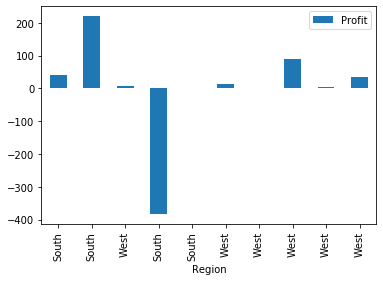

In [46]:
df.head(10).plot(kind='bar', y='Profit', x='Region')

The above occurence of duplicated regions requires cleaning of the Region column to reolve the problem

In [48]:
df['Region'] = df['Region'].str.strip()

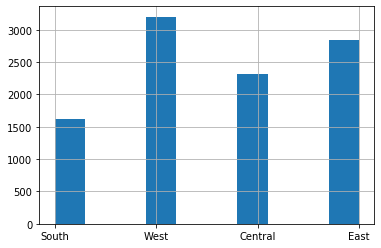

In [50]:
df['Region'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1F524DA88>,
      dtype=object)

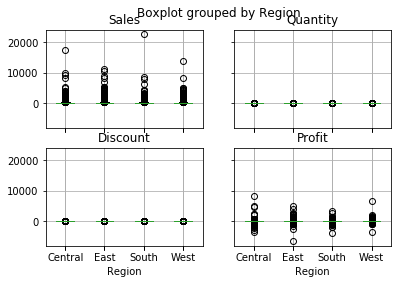

In [43]:
df.boxplot(['Sales', 'Quantity', 'Discount', 'Profit'], by='Region')

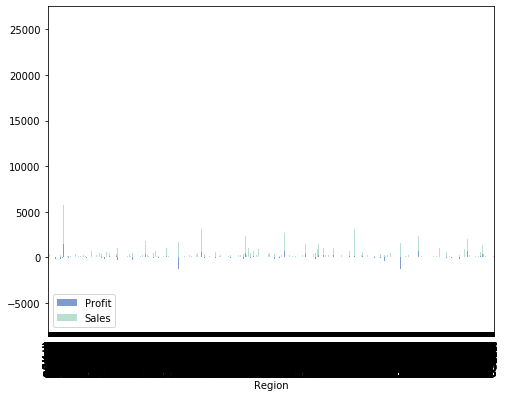

In [45]:
df.plot(
kind='bar',
y=['Profit', 'Sales'],
x='Region',
stacked=True,
color=['#809BCE', '#B8E0D2'],
figsize=(8, 6)).legend(loc='lower left')